In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '../generated/'
cookies_recipes = pd.read_json(data_path + 'clean_cookies_recipes.json')
kaggle_recipes = pd.read_json(data_path + 'clean_kaggle_recipes.json')

In [3]:
cookies_recipes = cookies_recipes[['id', 'title', 'recipe']]
kaggle_recipes = kaggle_recipes[['id', 'recipe']]

In [4]:
all_recipes = pd.concat([cookies_recipes, kaggle_recipes], sort=False)

In [5]:
df_recipe = all_recipes['recipe'].apply(pd.Series).stack().to_frame().reset_index()
df_recipe = df_recipe[0].to_frame()

In [6]:
df_recipe = df_recipe.rename({0:'ingredient'}, axis=1)

In [7]:
df_recipe

,ingredient
0,butter
1,stalks celery
2,carrot
3,onion
4,green bell pepper
5,gold medalâ® all-purpose flour
6,pepper
7,rice
8,water
9,chicken broth


In [8]:
len(df_recipe['ingredient'].unique())

27537

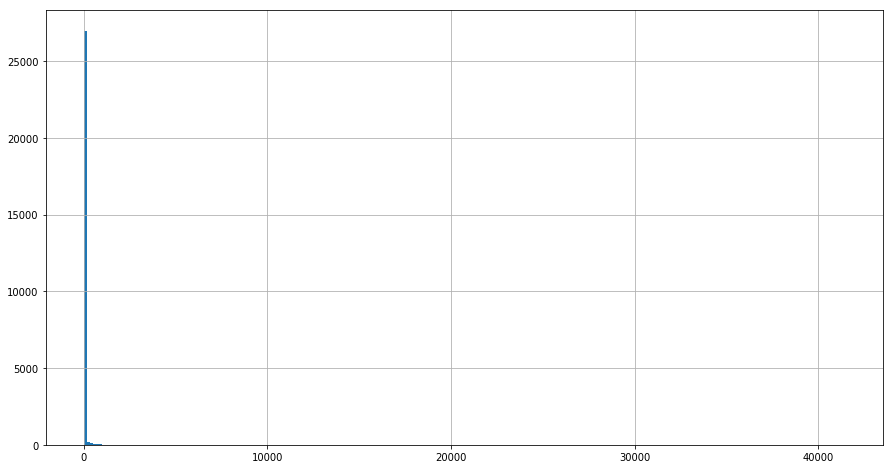

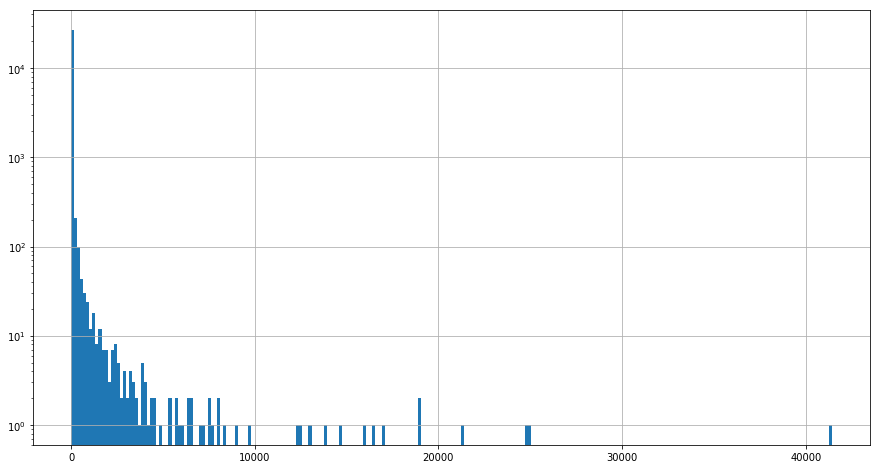

In [9]:
count_table = df_recipe['ingredient'].value_counts().to_frame()
count_table['ingredient'].hist(bins=250, figsize=(15, 8))
plt.show()
ax = count_table['ingredient'].hist(bins=250, figsize=(15, 8))
ax.set_yscale('log')
plt.show()

In [10]:
(count_table[count_table>=2].sum()) / count_table.sum()

ingredient    0.982708
dtype: float64

In [11]:
without_junk = count_table[count_table['ingredient'] > 4].rename({'ingredient':'count'}, axis = 1)
#without_junk.to_json("generated/ingredients_count.json")

In [12]:
count_table

,ingredient
salt,41429
onion,25006
butter,24760
water,21339
egg,18975
sugar,18942
black pepper,17001
olive oil,16542
pepper,15976
garlic,14730


In [13]:
count_table[count_table.index.str.contains('sil')]

,ingredient
basil,5987
thai basil,259
silken tofu,116
fusilli,69
basil pesto sauce,51
bunch basil,49
pasilla chile,48
basil pesto,31
tomato basil sauce,29
chiffonade basil,20
